In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv('adult.csv')

In [80]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [81]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [82]:
data.duplicated().sum()

52

In [83]:
data.drop_duplicates(inplace = True)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [85]:
for i in data.columns:
  print(data[i].value_counts())

36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64
9     15770


In [86]:
data['workclass'].replace('?','others',inplace = True)
data['occupation'].replace('?','others',inplace = True)
data['native-country'].replace('?','others',inplace = True)

In [87]:
print(data['workclass'].value_counts())
print(data['occupation'].value_counts())
print(data['native-country'].value_counts())

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
others               2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
others               2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64
United-States                 43792
Mexico                          943
others                          856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                      

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()

In [90]:
data1 = pd.DataFrame()
for i in data.columns:
  if data[i].dtypes == 'object':
    data1[i] = le.fit_transform(data[i])

In [91]:
data.workclass.value_counts().index

Index(['Private', 'Self-emp-not-inc', 'Local-gov', 'others', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype='object')

In [92]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48790 entries, 0 to 48789
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   workclass       48790 non-null  int64
 1   education       48790 non-null  int64
 2   marital-status  48790 non-null  int64
 3   occupation      48790 non-null  int64
 4   relationship    48790 non-null  int64
 5   race            48790 non-null  int64
 6   gender          48790 non-null  int64
 7   native-country  48790 non-null  int64
 8   income          48790 non-null  int64
dtypes: int64(9)
memory usage: 3.4 MB


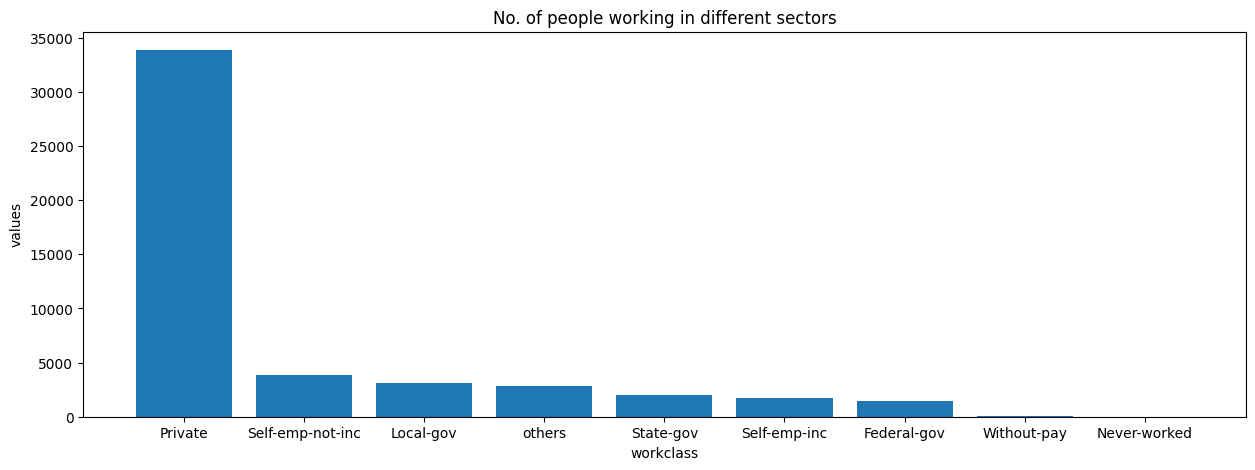

In [93]:
plt.figure(figsize = (15,5))
plt.bar(data.workclass.value_counts().index,data.workclass.value_counts().values)
plt.xlabel('workclass')
plt.ylabel('values')
plt.title('No. of people working in different sectors')
plt.show()

In [94]:
#as per the above plot we can see a significant amount of people working in private class

In [95]:
# let's check how much people from diffrent sector earns

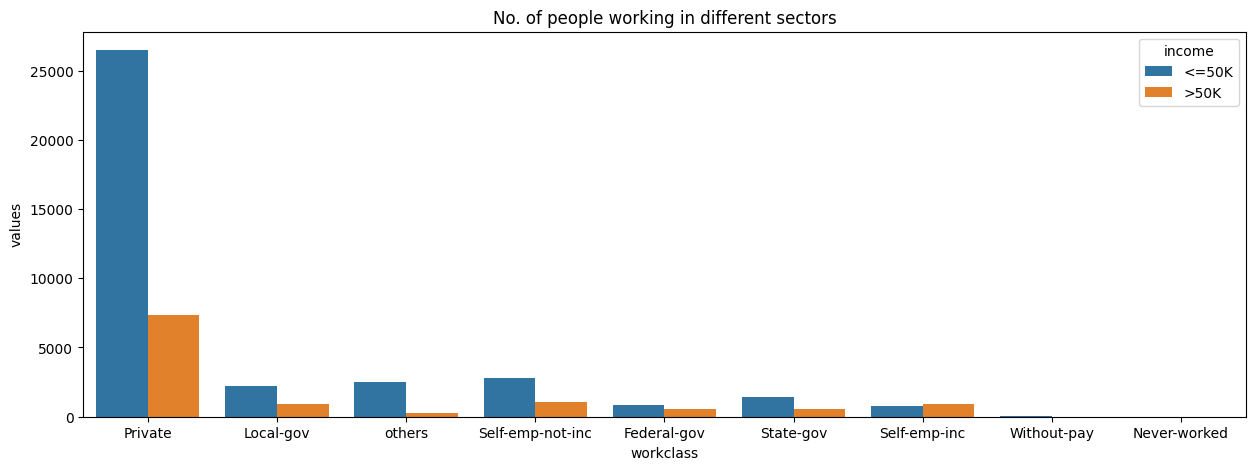

In [96]:
plt.figure(figsize = (15,5))
sns.countplot(x = data.workclass,hue = data.income)
plt.xlabel('workclass')
plt.ylabel('values')
plt.title('No. of people working in different sectors')
plt.show()

In [97]:
# people earning more than 50k are very less for all sectors except self employed people where major
# percentage is earning more than 50k

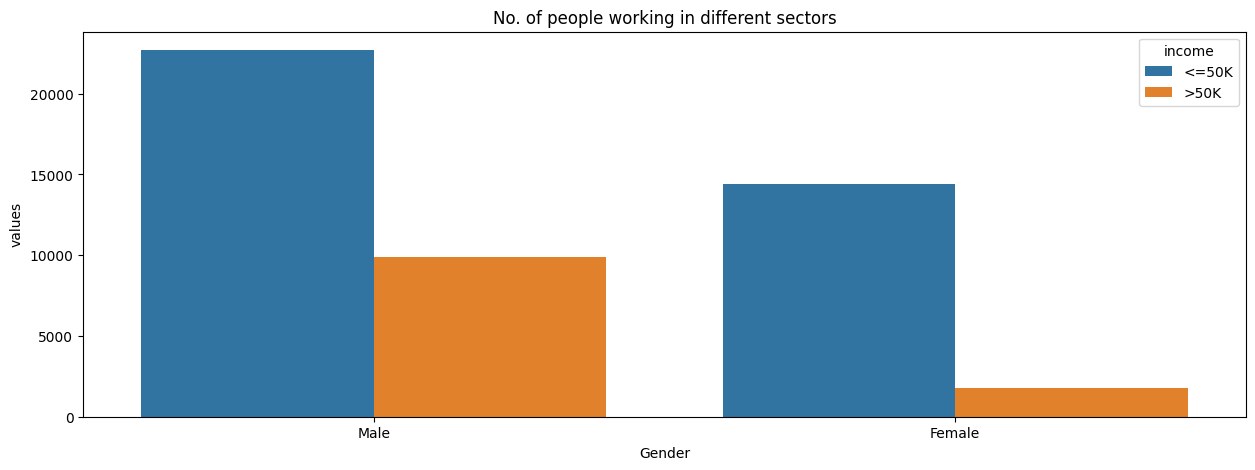

In [98]:
plt.figure(figsize = (15,5))
sns.countplot(x = data.gender,hue = data.income)
plt.xlabel('Gender')
plt.ylabel('values')
plt.title('No. of people working in different sectors')
plt.show()

In [99]:
#as per the graph males are earning more in comparison to females also there is significant diffrence
#between males earning more than 50k and females earning more than 50k

In [101]:
data1.describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,3.386145,10.287989,2.618077,6.440992,1.443472,3.667903,0.668457,36.488010,0.239414
std,1.590010,3.874617,1.507877,4.329715,1.602571,0.846133,0.470773,6.057139,0.426730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,38.000000,0.000000
50%,3.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,38.000000,0.000000
75%,3.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,38.000000,0.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000


<Axes: >

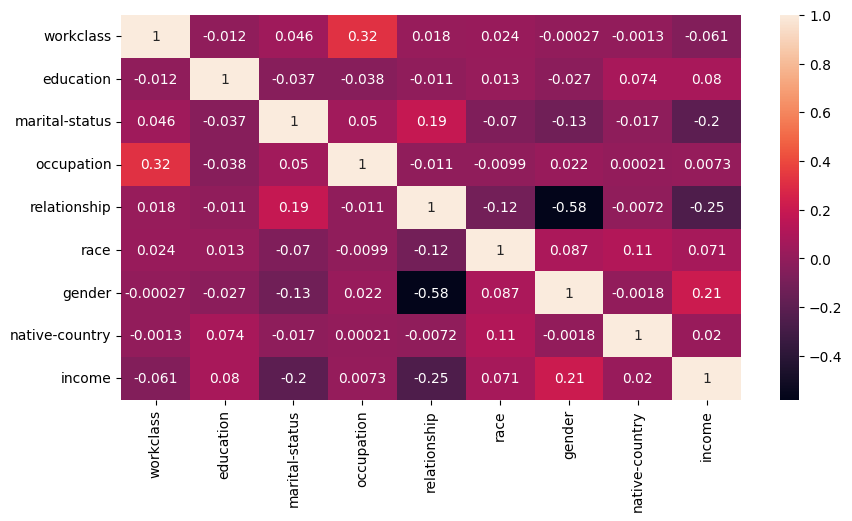

In [104]:
plt.figure(figsize = (10,5))
sns.heatmap(data1.corr(),annot = True)

In [106]:
x = data1.drop('income',axis = 1)
y = data1['income']

In [105]:
from sklearn.model_selection import train_test_split

In [107]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [120]:
from pycaret.classification import *

In [121]:
se = setup(data1,target = 'income',session_id = 222)

,Description,Value
0,Session id,222
1,Target,income
2,Target type,Binary
3,Original data shape,"(48790, 9)"
4,Transformed data shape,"(48790, 9)"
5,Transformed train set shape,"(34153, 9)"
6,Transformed test set shape,"(14637, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [122]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8323,0.8780,0.5379,0.6933,0.6056,0.5013,0.5079,2.1060
gbc,Gradient Boosting Classifier,0.8309,0.8763,0.5198,0.6969,0.5953,0.4913,0.4998,1.5960
xgboost,Extreme Gradient Boosting,0.8308,0.8747,0.5518,0.6814,0.6097,0.5032,0.5079,0.4800
ada,Ada Boost Classifier,0.8263,0.8729,0.5243,0.6777,0.5910,0.4830,0.4896,0.7600
rf,Random Forest Classifier,0.8250,0.8578,0.5426,0.6649,0.5974,0.4870,0.4913,1.8180
et,Extra Trees Classifier,0.8239,0.8425,0.5289,0.6667,0.5897,0.4795,0.4848,1.8200
dt,Decision Tree Classifier,0.8169,0.8186,0.5342,0.6416,0.5828,0.4668,0.4701,0.0730
knn,K Neighbors Classifier,0.8016,0.8209,0.5651,0.5906,0.5772,0.4478,0.4482,1.0680
dummy,Dummy Classifier,0.7606,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0360
ridge,Ridge Classifier,0.7604,0.0000,0.0001,0.1000,0.0002,-0.0002,-0.0025,0.0450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#from pycaret we can see the top 3 best performing model for this dataset
#we will consider xgb as of the top 3 xgb has the best recall score and here recall score is most important

In [123]:
from xgboost import XGBClassifier

In [124]:
xgb = XGBClassifier()

In [125]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [127]:
ypred_xgb = xgb.predict(xtest)

In [128]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report

In [136]:
print(classification_report(ytest,ypred_xgb,target_names= data.income.value_counts().index))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      7440
        >50K       0.69      0.54      0.60      2318

    accuracy                           0.83      9758
   macro avg       0.78      0.73      0.75      9758
weighted avg       0.82      0.83      0.82      9758



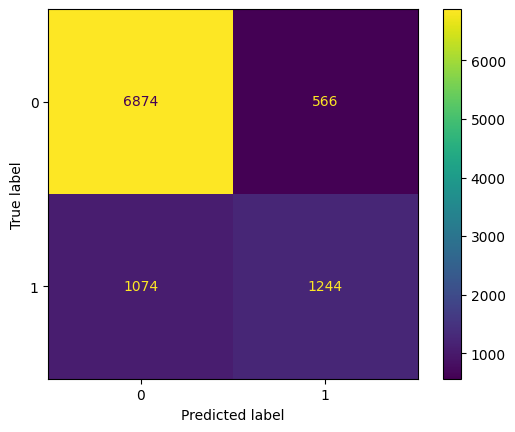

In [140]:
cm = confusion_matrix(ytest,ypred_xgb)
ConfusionMatrixDisplay(cm).plot()

In [141]:
accuracy_score(ytest,ypred_xgb)

0.8319327731092437